## EDA group project on the Netflix dataset  
#### (WTFC'23 Data science GroupA Room 3)



#### Table of contents

1. Load in the data set (Netflix)
2. Check for missing values
3. Check for an overview of the data
4. Drop the few null rows in Date added, rating and duration columns respectively
5. Fill in the null rows in director, cast and country column with (“None Specified”, “Nonelisted” and “Non Specified “) respectively
6. Recheck for missing values
7. Check the value count for Duration column
8. Check the value count for type column
9. Using pie chart in matplotlib visualize the type column (Movie and TV Show)
10. Subset the data to only include Movies in the type Column
11. Get the counts of directors in the dataset
12. Visualize the top movies directors
13. Check for outliers in the duration column
14. What are the top countries by movies counts
15. Visualize the top countries by movie count
16. Select movies type that are been released in the last 10 year (where years >=2012)
17. Using bar plot, show the count of movies and series produced in the last 10 years(where years >= 2012)
18. Using a count plot show the total movies and TV show been released in the last 10 years
19. Check for unique rating
20. Explore the data


#### <font color = #F1C40F>_Start by importing all the necessary libraries; NumPy, Pandas, Seaborn and MatPlotLib_<font>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#from google.colab import files # This is how you upload a file to colab
#uploaded = files.upload()

#### <font color = #28B463>_1. Load in the data set (Netflix)_<font>

In [3]:
#import io
#netflix = pd.read_csv(io.BytesIO(uploaded["netflix_titles.csv"]))

netflix=pd.read_csv("netflix_titles.csv")

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### <font color = #28B463>_2. Check for missing values_<font>

In [5]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### <font color = #28B463>_3. Check for an overview of the data_<font>

In [6]:
netflix.shape      #displays number of rows and columns

(8807, 12)

In [7]:
netflix.columns #displays the column titles

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


#### <font color = #28B463>_4. Drop the few null rows in Date added, rating and duration columns respectively_<font>

In [10]:
netflix.dropna(subset = ["date_added", "rating", "duration"], inplace = True)

In [11]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

#### <font color = #28B463>_5. Fill in the null rows in director, cast and country column with (“None Specified”, “Nonelisted” and “Non Specified “) respectively_<font>

In [13]:
netflix.fillna({"director" : "None Specified", "cast" : "Nonelisted", "country" : "Non Specified"},inplace = True)

#### <font color = #28B46F>_6. Recheck for missing values_<font>

In [20]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### <font color = #28B463>_7. Check the value count for Duration column_<font>

In [26]:
#netflix.value_counts(subset = ['duration']).sum()

netflix["duration"].value_counts().sum()

8790

#### <font color = #28B463>_8. Check the value count for type column_<font>

In [28]:
# netflix.value_counts(subset = ['type']).sum()

netflix["type"].value_counts().sum()

8790

#### <font color = #28B463>_9. Using pie chart in matplotlib visualize the type column (Movie and TV Show)_<font>

In [29]:
netflix['type'] 
type1 = netflix['type'].value_counts().index
type2 = netflix['type'].value_counts().values

In [31]:
# plt.pie(x = netflix['type'].value_counts(), labels = ['Movie', 'TV Show'])
# plt.show()

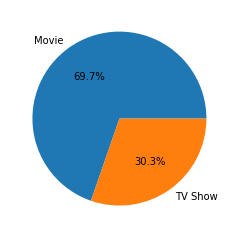

In [32]:
plt.pie(labels = type1, x = type2, autopct='%1.1f%%')
plt.show()

#### <font color = #28B463>_10. Subset the data to only include Movies in the type Column_<font>

In [33]:
netflix[netflix['type'] == 'Movie'].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Nonelisted,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


#### <font color = #28B463>_11. Get the counts of directors in the dataset_<font>

In [34]:
netflix['director'].nunique() # displays the unique count of directors 

4527

#### <font color = #28B463>_12. Visualize the top movies directors_<font>

In [35]:
netflix['director'].mode() # This gives the director with most movies

0    None Specified
dtype: object

In [36]:
netflix['director'].value_counts()

None Specified                                2621
Rajiv Chilaka                                   19
Raúl Campos, Jan Suter                          18
Suhas Kadav                                     16
Marcus Raboy                                    16
Jay Karas                                       14
Cathy Garcia-Molina                             13
Youssef Chahine                                 12
Martin Scorsese                                 12
Jay Chapman                                     12
Steven Spielberg                                11
Don Michael Paul                                10
David Dhawan                                     9
Yılmaz Erdoğan                                   8
Robert Rodriguez                                 8
Ryan Polito                                      8
Kunle Afolayan                                   8
Lance Bangs                                      8
Hakan Algül                                      8
Quentin Tarantino              

In [39]:
movies = netflix[netflix['type'] == 'Movie']

top_dir = movies[movies["director"] != "None Specified"]["director"].value_counts().head() #just selecting rows that have actual names
top_dir

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: director, dtype: int64

In [47]:
#I want to use this to define a base color, the colors can be accessed through indexing
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

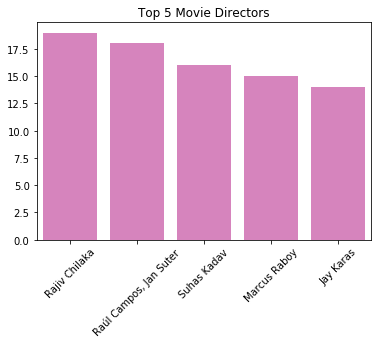

In [50]:
#define a base color
base_color = sns.color_palette()[6] #just because I think purple is cool :)
#plot the bar chart
sns.barplot(x=top_dir.index, y=top_dir.values, color=base_color)
plt.xticks(rotation=45) #so the xticks won't overlap
plt.title("Top 5 Movie Directors"); #adds a title to the plot  #apt!

In [ ]:
'''movies = netflix[netflix['type'] == 'Movie']
movies
netflix['director'].value_counts()
netflix_dir = movies[movies['director'].value_counts().head()]
sns.countplot(data = netflix_dir, x = 'director')
'''

"movies = netflix[netflix['type'] == 'Movie']\nmovies\nnetflix['director'].value_counts()\nnetflix_dir = movies[movies['director'].value_counts().head()]\nsns.countplot(data = netflix_dir, x = 'director')\n"

#### <font color = #28B463>_13. Check for outliers in the duration column_<font>

---




In [51]:
#For this question, going with the formula that helps in identifying outliers, I feel we should have a numeric column.
#Also, I think subsetting the data (movies and TV Shows seperately) will help because the movies and series don't have the same unit for measuring duration
#For the movies;
movies["duration_num"] = movies["duration"].str.split().str[0] #using this to separate the 'minutes' and actual numbers, by first converting each row to a string so we can use .split() which is a string method
movies["duration_num"] = pd.to_numeric(movies["duration_num"]) #converting the new column to a numeric column

movies["duration_num"].dtype #confirming we have the right data type

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


dtype('int64')

In [56]:
movies["duration_num"].head()

0      90
6      91
7     125
9     104
12    127
Name: duration_num, dtype: int64

In [52]:
#Now we can check for outliers with quartiles and interquartile range
#lower_bound = q1 -(1.5 * iqr)
#upper_bound = q3 + (1.5 * iqr)
#iqr = q3 - q1
# If you'd rather specify q from [0, 1], use np.quantile. For [0, 100], use np.percentile.

#calculate q1, q3 and iqr
q1 = np.quantile(movies["duration_num"], 0.25) #to get the first quartile
q3 = np.quantile(movies["duration_num"], 0.75) #to get the third quartile
iqr = q3 - q1
print(q1, q3, iqr)

87.0 114.0 27.0


In [57]:
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound, upper_bound)

46.5 154.5


In [ ]:
#outliers are those below the lower bound or above the upper bound
outliers = movies[(movies["duration_num"] < lower_bound) |(movies["duration_num"] > upper_bound)]['duration']
outliers.head()

22    161 min
24    166 min
45     23 min
71     13 min
73    182 min
Name: duration, dtype: object

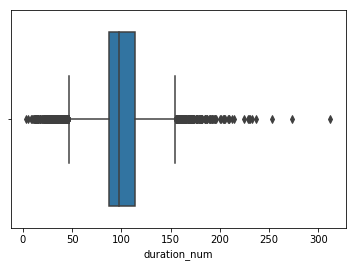

In [58]:
#Let's visualize
#Notice the lower and upper bounds we calculated (46.5 154.5)
sns.boxplot(x=movies["duration_num"]);

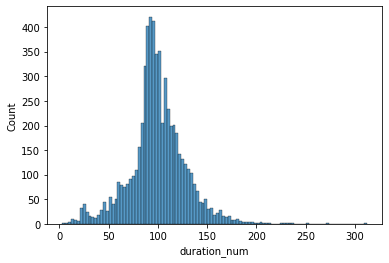

In [ ]:
#create a histogram
sns.histplot(movies['duration_num']) # from the plot, data is slightly skewed to the right

#### <font color = #28B463>_14. What are the top countries by movies counts_<font>

In [60]:
just_movie_countries = movies[movies["country"] != "Non Specified"] #subsetting for only actual country names
#top_countries = just_movie_countries["country"].value_counts().head()
top_countries = just_movie_countries["country"].value_counts().reset_index().rename(columns = {'index':'Country','country':'Count'}).head()
top_countries

,Country,Count
0,United States,2055
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97


#### <font color = #28B463>_15. Visualize the top countries by movie count_<font>

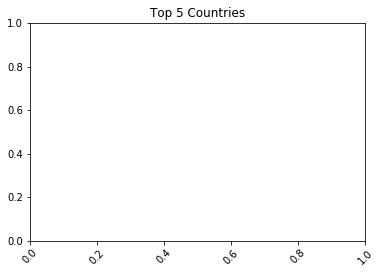

In [62]:
#sns.barplot(x=top_countries.index, y=top_countries.values, color=base_color)
plt.xticks(rotation=45)
plt.title("Top 5 Countries");

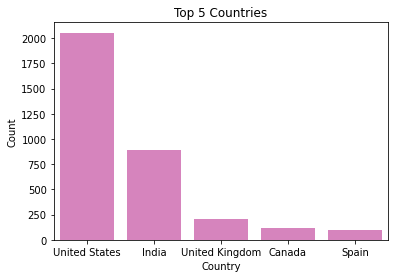

In [ ]:
sns.barplot(x=top_countries.Country, y=top_countries.Count, color=base_color)
plt.xticks(rotation=45)
plt.title("Top 5 Countries");

#### <font color = #28B463>_16. Select movies type that are been released in the last 10 year (where years >=2012)_<font>

In [63]:
last_10_yrs_movies = movies[movies["release_year"] >= 2012]
last_10_yrs_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Nonelisted,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Non Specified,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91


#### <font color = #28B463>_17. Using bar plot, show the count of movies and series produced in the last 10 years(where years >= 2012)_<font>

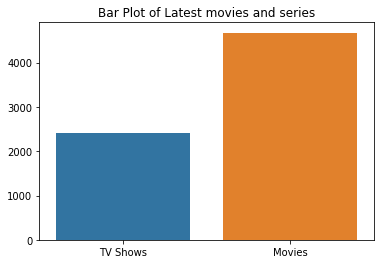

In [64]:
series = netflix[netflix["type"] == "TV Show"]
last_10_yrs_series = series[series["release_year"] >= 2012]

series_count = last_10_yrs_series.shape[0] #total rows that are TV Shows
movies_count = last_10_yrs_movies.shape[0] #total rows that are movies

sns.barplot(x=["TV Shows", "Movies"], y=[series_count, movies_count])
plt.title("Bar Plot of Latest movies and series");

#### <font color = #28B463>_18. Using a count plot show the total movies and TV show been released in the last 10 years_<font>

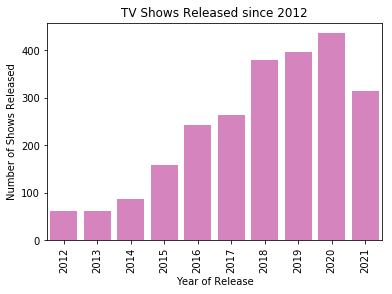

In [68]:
sns.countplot(x="release_year", data = last_10_yrs_series, color = base_color)
plt.title("TV Shows Released since 2012")
plt.xlabel("Year of Release")
plt.xticks(Rotation = 90)
plt.ylabel("Number of Shows Released");

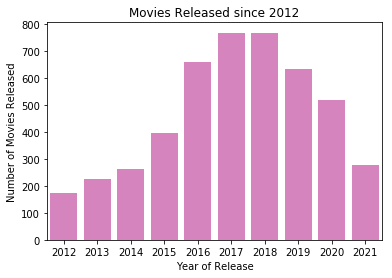

In [69]:
sns.countplot(x="release_year", data = last_10_yrs_movies, color = base_color)
plt.title("Movies Released since 2012") 
plt.xlabel("Year of Release")
plt.ylabel("Number of Movies Released");

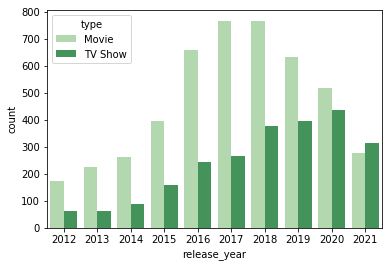

In [70]:
last_10_yrs_total = netflix[netflix['release_year'] >= 2012]
sns.countplot(x = 'release_year', data = last_10_yrs_total, hue = 'type', palette = 'Greens');

#### <font color = #28B463>_19. Check for unique rating_<font>

In [71]:
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

#### <font color = #28B463>_20. Explore the data_<font> 

In [72]:
#Have movies been getting shorter in the recent past? Let us explore ...
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Nonelisted,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Non Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None Specified,Nonelisted,Non Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [73]:
# Filter for durations shorter than 60 minutes
short_movies = movies[movies['duration_num'] < 60]
short_movies[0:20]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,Nonelisted,Non Specified,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",Non Specified,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
77,s78,Movie,Little Singham - Black Shadow,Prakash Satam,"Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaush...",Non Specified,"September 11, 2021",2021,TV-Y7,48 min,"Children & Family Movies, Comedies",Kid cop Little Singham loses all his superpowe...,48
279,s280,Movie,Monster Hunter: Legends of the Guild,Steven Yamamoto,"Ben Rausch, Erica Lindbeck, Dante Basco, Brand...","United States, Japan","August 12, 2021",2021,TV-PG,59 min,"Action & Adventure, Anime Features, Children &...",In a world where humans and fearsome monsters ...,59
470,s471,Movie,Bridgerton - The Afterparty,None Specified,"David Spade, London Hughes, Fortune Feimster",Non Specified,"July 13, 2021",2021,TV-14,39 min,Movies,"""Bridgerton"" cast members share behind-the-sce...",39
484,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,Lee Su-geun,Non Specified,"July 9, 2021",2021,TV-G,46 min,Stand-Up Comedy,Lee Su-geun's rise to Korean comedy stardom we...,46
495,s496,Movie,Awon Boyz,Tolulope Itegboje,Nonelisted,Non Specified,"July 7, 2021",2019,TV-MA,38 min,"Documentaries, International Movies",This documentary takes a close look at the liv...,38
560,s561,Movie,Audible,Matt Ogens,Nonelisted,Non Specified,"July 1, 2021",2021,PG-13,39 min,"Documentaries, Sports Movies","Shaken by a friend's suicide, a Deaf high scho...",39
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",Non Specified,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12


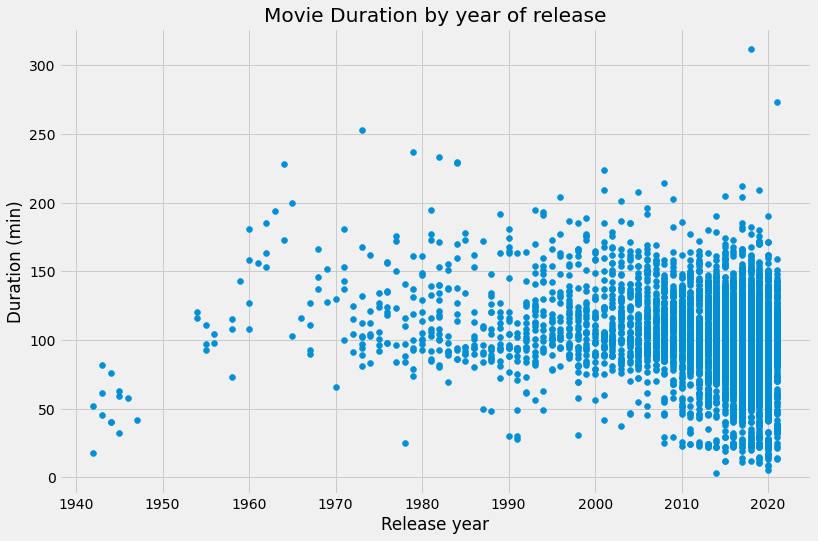

In [ ]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(x = movies.release_year, y = movies.duration_num)

# Create a title and axis labels
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title("Movie Duration by year of release")


# Show the plot
plt.show()

#There has been no significant change in thr duration of movies across the years,
#but as we can see from the scatterplot, the number of movies has drastically increased along the
#years.


#### Thanks for going through... (your corrections and commendations would be highly appreciated...)